### Project Objective: 
##### Catching cheaters in Counter Strike: Global Offensive (CSGO)
The idea is that using players performance metrics in regards to weapon accuracy, we can predict which cheaters are using AimBots. An AimBot is a cheat software injected into the game that allows the player to benefit from perfect accuracy. Becuase cheaters fall in the top percentile in weapon accuracy, statistical classification should work fairly well to identify anamolies in the group.

### Imports

In [161]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

### Reading the data

In [199]:
df = pd.read_csv("./CSGODataset Temp.csv")

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26533 entries, 0 to 26532
Columns: 288 entries, GI.lesson.Csgo_cycle_items_gp to total_wins_pistolround
dtypes: float64(286), int64(1), object(1)
memory usage: 58.3+ MB


In [ ]:
### Most of these features are not relative to the objective in this project.

In [203]:
df.isnull().sum()

GI.lesson.Csgo_cycle_items_gp                       26283
GI.lesson.Csgo_cycle_weapons_gp                     26129
GI.lesson.Csgo_cycle_weapons_kb                      1055
GI.lesson.Csgo_instr_explain_defuse_kit_carrier     26500
GI.lesson.bomb_sites_A                               5057
GI.lesson.bomb_sites_B                               5025
GI.lesson.csgo_hostage_follow_stop                  26499
GI.lesson.csgo_hostage_lead_to_hrz                  10049
GI.lesson.csgo_instr_explain_bomb_carrier            1431
GI.lesson.csgo_instr_explain_buyarmor                4206
GI.lesson.csgo_instr_explain_buymenu                 1298
GI.lesson.csgo_instr_explain_defend_bomb            26500
GI.lesson.csgo_instr_explain_follow_bomber           2535
GI.lesson.csgo_instr_explain_inspect                 4356
GI.lesson.csgo_instr_explain_pickup_bomb             3388
GI.lesson.csgo_instr_explain_plant_bomb              3093
GI.lesson.csgo_instr_explain_prevent_bomb_pickup     3399
GI.lesson.csgo

In [204]:
#fill na values with 0. Some players did not use all the weapons yet. 
df = df.fillna(0)

#group by class and calculate the percent accuracy of each weapon group
df["total_AR_shots"] = df['total_shots_sg556']+df['total_shots_sg552']+df['total_shots_sg550']+df['total_shots_ak47']+df['total_shots_aug']+df['total_shots_famas']+df['total_shots_g3sg1']+df['total_shots_galil']+df['total_shots_galilar']+df['total_shots_m4a1']
df["total_SMG_shots"] = df['total_shots_bizon']+df['total_shots_p90']+df['total_shots_mac10']+df['total_shots_mp5navy']+df[ 'total_shots_mp7']+df['total_shots_mp9']+df['total_shots_ump45']
df["total_pistol_shots"] = df['total_shots_usp']+df['total_shots_tec9']+df['total_shots_fiveseven']+df['total_shots_deagle']+df['total_shots_glock']+df['total_shots_hkp2000']+df['total_shots_p228']+df['total_shots_p250'] 
df["total_LMG_shots"] = df['total_shots_m249'] + df['total_shots_negev']
df["total_sniper_shots"] = df['total_shots_scar17']+df['total_shots_ssg08']+df['total_shots_scout']+df['total_shots_awp'] 

df["total_AR_hits"] = df['total_hits_sg556']+df['total_hits_sg552']+df['total_hits_sg550']+df['total_hits_ak47']+df['total_hits_aug']+df['total_hits_famas']+df['total_hits_g3sg1']+df['total_hits_galil']+df['total_hits_galilar']+df['total_hits_m4a1']
df["total_SMG_hits"] = df['total_hits_bizon']+df['total_hits_p90']+df['total_hits_mac10']+df['total_hits_mp5navy']+df[ 'total_hits_mp7']+df['total_hits_mp9']+df['total_hits_ump45']
df["total_pistol_hits"] = df['total_hits_usp']+df['total_hits_tec9']+df['total_hits_fiveseven']+df['total_hits_deagle']+df['total_hits_glock']+df['total_hits_hkp2000']+df['total_hits_p228']+df['total_hits_p250'] 
df["total_LMG_hits"] = df['total_hits_m249'] + df['total_hits_negev']
df["total_sniper_hits"] = df['total_hits_scar17']+df['total_hits_ssg08']+df['total_hits_scout']+df['total_hits_awp'] 

df["AR_acc"] = df["total_AR_hits"]/df["total_AR_shots"]
df["SMG_acc"] = df["total_SMG_hits"]/df["total_SMG_shots"]
df["pistol_acc"] = df["total_pistol_hits"]/df["total_pistol_shots"]
df["LMG_acc"] = df["total_LMG_hits"]/df["total_LMG_shots"]
df["sniper_acc"] = df["total_sniper_hits"]/df["total_sniper_shots"]

df["total_acc"] = df["total_shots_hit"]/df["total_shots_fired"]
df["MVP_per_game"] = df["total_mvps"]/df["total_matches_played"]

final_cols = ["steamid","AR_acc", "SMG_acc","pistol_acc","LMG_acc","sniper_acc","total_acc", "total_matches_played"]

final_df = df[final_cols]

In [256]:
final_df

,steamid,AR_acc,SMG_acc,pistol_acc,LMG_acc,sniper_acc,total_acc,total_matches_played
0,76561198145584553,NaN,0.351852,NaN,NaN,NaN,0.351852,0.0
1,76561198142230244,0.143358,0.159086,0.164393,0.047976,0.299291,0.154816,3431.0
2,76561198143678230,0.176131,0.178420,0.209838,0.025253,0.352375,0.177514,1038.0
3,76561198146070673,0.184468,0.182125,0.196813,0.074958,0.333579,0.192323,3336.0
4,76561198144242009,0.188171,0.173035,0.183734,0.071559,0.367503,0.186940,1635.0
5,76561198146576370,0.216314,0.244173,0.253458,0.070881,0.351080,0.216497,869.0
6,76561198145127689,0.157005,0.118952,0.143598,0.039301,0.267341,0.143320,1065.0
7,76561198149372302,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,76561198146272721,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,76561198145865948,0.145822,0.186421,0.199817,0.093023,0.443662,0.163455,24.0


#### We still have a number of players which have almost no games played. Below I filter out all players that have not played 30 games or more. A minimum of 30 matches player is the requirement for playing competitive matches. Due to the law of large numbers this will minimize variance in players which barely play the game. There is no need to classify them as cheaters since they did not fire the weapon much yet.

In [257]:
final_df = final_df.loc[(final_df["total_matches_played"]>=30)]

In [291]:
final_df = final_df.fillna(0)
final_cols = ["AR_acc", "SMG_acc","pistol_acc","LMG_acc","sniper_acc","total_acc", "is_cheater"]
final_df = df[final_cols]

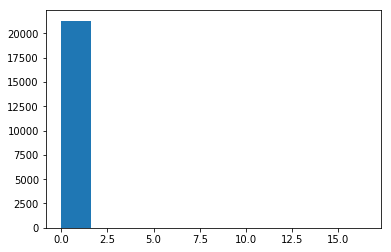

In [260]:
plt.hist([final_df["total_acc"]])
plt.show()

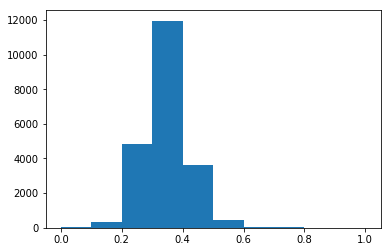

In [261]:
plt.hist([final_df["sniper_acc"]],range = [0, 1])
plt.show()

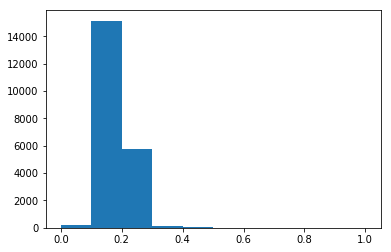

In [262]:
plt.hist([final_df["AR_acc"]],range = [0, 1])
plt.show()

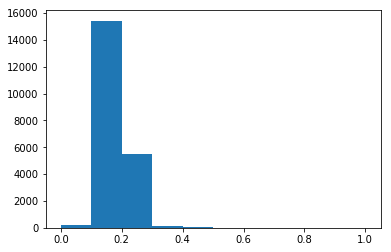

In [263]:
plt.hist([final_df["SMG_acc"]],range = [0, 1])
plt.show()

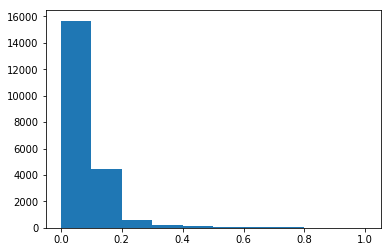

In [264]:
plt.hist([final_df["LMG_acc"]],range = [0, 1])
plt.show()

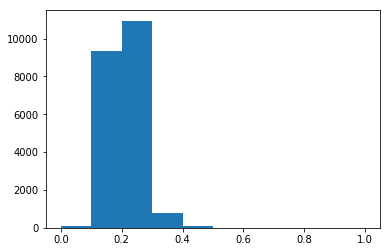

In [265]:
plt.hist([final_df["pistol_acc"]],range = [0, 1])
plt.show()

In [269]:
len(final_df)

21253

In [272]:
len(final_df.loc[(final_df["is_cheater"]==1)])

1662

In [273]:
cheater_set = final_df.loc[(final_df["is_cheater"]==1)]
normal_set = final_df.loc[(final_df["is_cheater"]==0)]

/Users/Brennan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


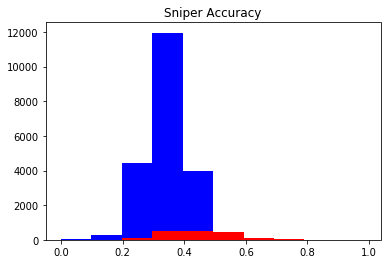

In [274]:
plt.hist([cheater_set["sniper_acc"],normal_set["sniper_acc"]], stacked = 1, color = ['r', 'b'])
plt.title("Sniper Accuracy")
plt.show()

/Users/Brennan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


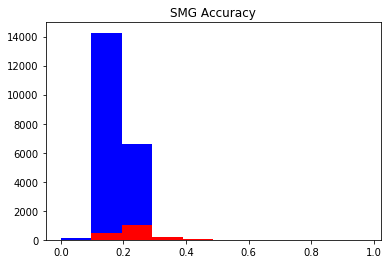

In [275]:
plt.hist([cheater_set["SMG_acc"],normal_set["SMG_acc"]], stacked = 1, color = ['r', 'b'])
plt.title("SMG Accuracy")
plt.show()

/Users/Brennan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


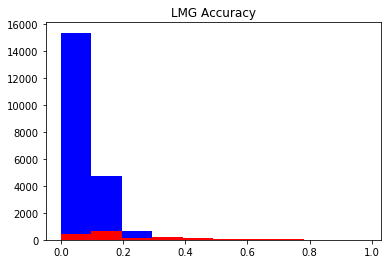

In [276]:
plt.hist([cheater_set["LMG_acc"],normal_set["LMG_acc"]], stacked = 1, color = ['r', 'b'])
plt.title("LMG Accuracy")
plt.show()

/Users/Brennan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


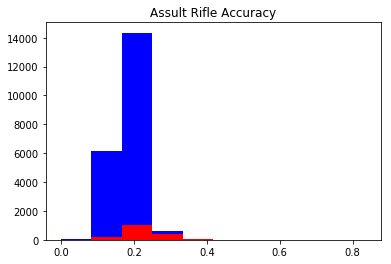

In [277]:
plt.hist([cheater_set["AR_acc"],normal_set["AR_acc"]], stacked = 1, color = ['r', 'b'])
plt.title("Assult Rifle Accuracy")
plt.show()

/Users/Brennan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


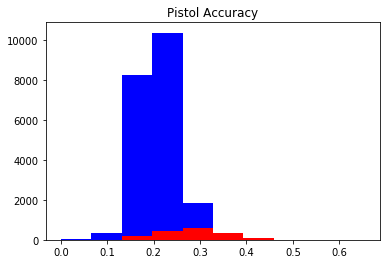

In [278]:
plt.hist([cheater_set["pistol_acc"],normal_set["pistol_acc"]], stacked = 1, color = ['r', 'b'])
plt.title("Pistol Accuracy")
plt.show()

/Users/Brennan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


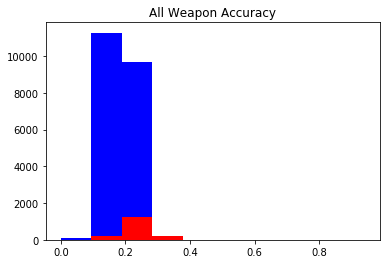

In [279]:
plt.hist([cheater_set["total_acc"],normal_set["total_acc"]], stacked = 1, color = ['r', 'b'])
plt.title("All Weapon Accuracy")
plt.show()

In [281]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop('is_cheater', axis=1), final_df["is_cheater"], test_size=0.20, random_state=42)

In [247]:
def confusionCheck(y_pred, y_test):
    
    y_check = list(y_test)
    y_pred = list(y_pred)

    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    
    i = 0
    while i < len(results)-1:
        if y_pred[i] == 1 and y_check[i] == 1:
            true_positive += 1
        elif y_pred[i] == 1 and y_check[i] == 0:
            false_positive += 1
        elif y_pred[i] == 0 and y_check[i] == 0:
            true_negative += 1
        else: 
            false_negative += 1
        i += 1



    print("True Positive "+str(true_positive))

    print("True Negative "+str(true_negative))

    print("False Positive "+str(false_positive))

    print("False Negative "+str(false_negative))


In [283]:
resultsCorrect = []

knn = KNeighborsClassifier()
knn.fit(X_train, y_train) 
KNeighborsClassifier(algorithm='auto', leaf_size=15, metric='minkowski',
       metric_params=None, n_jobs=1, n_neighbors=2, p=2,
       weights='uniform')
results = knn.predict(X_test)
print(np.mean(results == y_test))



0.918842625265


In [285]:
y_check = list(y_test)

true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
i = 0
while i < len(results):
    if results[i] == 1 & y_check[i] == 1:
        true_positive += 1
    elif results[i] == 1 & y_check[i] == 0:
        false_positive += 1
    elif results[i] == 0 & y_check[i] == 0:
        true_negative += 1
    else: 
        false_negative += 1
    i += 1
    



print("True Positive "+str(true_positive))

print("True Negative "+str(true_negative))

print("False Positive "+str(false_positive))

print("False Negative "+str(false_negative))


True Positive 2
True Negative 314
False Positive 3904
False Negative 31


In [244]:
import imblearn
from imblearn.over_sampling import SMOTE
-
oversample = SMOTE()
X,y = oversample.fit_resample(X_train, y_train)

In [286]:
resultsCorrect = []

knn = KNeighborsClassifier()
knn.fit(X, y) 
KNeighborsClassifier(algorithm='auto', leaf_size=15, metric='minkowski',
       metric_params=None, n_jobs=1, n_neighbors=2, p=2,
       weights='uniform')
results = knn.predict(X_test)
print(np.mean(results == y_test))

confusionCheck(y_pred=results, y_test=y_test)


0.635144671842
True Positive 121
True Negative 2578
False Positive 1357
False Negative 194


In [246]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(X, y)

results = clf.predict(X_test)

print(accuracy_score(y_test, results, normalize=True))
confusionCheck(y_pred=results, y_test=y_test)


0.968007527641
True Positive 315
True Negative 3799
False Positive 136
False Negative 0


In [249]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)
results = clf.predict(X_test)
print(accuracy_score(y_test, results, normalize=True))

confusionCheck(y_pred=results, y_test=y_test)

0.959538932016
True Positive 313
True Negative 3765
False Positive 170
False Negative 2


In [290]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

clf = GradientBoostingClassifier(loss="exponential",random_state=0)
clf.fit(X, y)
results = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, results, normalize=True))

confusionCheck(y_pred=results, y_test=y_test)

0.972241825453
True Positive 315
True Negative 3817
False Positive 118
False Negative 0
